# **Insper - Eletromagnetismo e Ondulatória** #


**Modelagem Projeto Eletromag. (Parte 2 do Projeto)**

In [208]:
# Importanto as bibliotecas necessárias
from cmath import *
from numpy import linalg
from numpy import cos, sin, pi, sqrt
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import *

In [209]:
R1 = 0.1
R2 = R1
L1 = 10e-3
L2 = L1
C = 1e-7
K = 0.2
M = (sqrt(L1*L2))*K

In [210]:
f = 40e3
W = 2*pi*f
Ufonte = 10
XL1 = 1j * W * L1
XL2 = 1j * W * L2
XM = 1j * W * M
XC1 = 1/(1j * W * C)
XC2 = 1/(1j * W * C)

*Modelo Paralelo*

In [211]:

def CalcularParalelo(Uf, Rc):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+(Rc*XC2/(Rc+XC2))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [212]:
Rcarga = 30
i1, i2 = CalcularParalelo(Ufonte, Rcarga)

print('No modelo em paralelo, com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.2f A' %np.abs(i1))
print('i2 (eficaz) = %.2f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %Ufonte)
print('V2 (eficaz): %.2f V' %(np.abs(i2*Rcarga)))

print('Relação N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Relação i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Relação V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))

No modelo em paralelo, com resistor na saída de 30.00 Ω:
i1 (eficaz) = 0.00 A
i2 (eficaz) = 0.00 A
V1 (eficaz): 10.00 V
V2 (eficaz): 0.03 V
Relação N1/N2: 1.00
Relação i2/i1: 0.20
Relação V1/V2: 393.14


*Modelo em Série*

In [213]:
def CalcularEmSerie(Uf, Rc):
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+XC2+Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

In [214]:
Rcarga = 30
i1, i2 = CalcularEmSerie(Ufonte, Rcarga)

print('No modelo em série, com resistor na saída de %.2f Ω:' %Rcarga)
print('i1 (eficaz) = %.2f A' %np.abs(i1))
print('i2 (eficaz) = %.2f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %Ufonte)
print('V2 (eficaz): %.2f V' %(np.abs(i2*Rcarga)))

print('Relação N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Relação i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Relação V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(i2*Rcarga)))

No modelo em série, com resistor na saída de 30.00 Ω:
i1 (eficaz) = 0.00 A
i2 (eficaz) = 0.00 A
V1 (eficaz): 10.00 V
V2 (eficaz): 0.03 V
Relação N1/N2: 1.00
Relação i2/i1: 0.20
Relação V1/V2: 389.00


**Simulação do Circuito (Parte 3 do Projeto)**

*Cálculo da Resistência Peculiar*

In [215]:
def calcular_resistencia_pelicular(R_DC, f):
    return R_DC + (R_DC / 100e3)*f

*Cálculo da Eficiência da Potência*

In [216]:
def calcular_eficiencia(Ufonte, i1, Usaida, i2):

    P_saida = np.real(0.5 * Usaida * np.conjugate(i2))
    P_entrada = np.real(0.5 * Ufonte * np.conjugate(i1))
    eficiencia = P_saida / P_entrada
    return eficiencia

*Modelo em Série*

In [217]:
# Gráfico da eficiência do WPT com diferentes valores de capacitância

def graficoeficiencia_serie(ax, C_values, R_DC, Ufonte, Rcarga):
    ax2 = ax.twinx()
    ax.set_xlabel('Frequência de ressonância (Hz)')
    ax.set_ylabel('Eficiência (%) (---)')
    ax2.set_ylabel('Tensão de Saída (V)')
    
    for C in C_values:
        eficiencia = []
        tensao_saida = []
        frequencias = []
        freq_max = 100e3

        for f in np.linspace(1, freq_max+1, 1000):
            R_f = calcular_resistencia_pelicular(R_DC, f)
            
            # Recalculando os parâmetros do circuito para cada valor de frequência
            
            W = 2 * pi * f
            L = 1/(W**2 * C)
            M = L*K #(sqrt(L**2))*K
            XL1 = 1j * W * L
            XL2 = XL1
            XM = 1j * W * M
            XC1 = 1/(1j * W * C)
            XC2 = XC1

            # Calculando a corrente 1 e 2 do circuito em série

            Z = np.array([[R_f + XL1 + XC1, -XM], [-XM, XL2 + R_f + XC2 + Rcarga]])
            V = np.array([Ufonte, 0])
            I = np.dot(linalg.inv(Z), V)

            i1, i2 = I[0], I[1]
            Usaida = i2 * Rcarga
            
            eficiencia_f = calcular_eficiencia(Ufonte, i1, Usaida, i2)
            eficiencia.append(eficiencia_f * 100)
            tensao_saida.append(np.abs(Usaida))
            frequencias.append(f)

        ax.plot(frequencias, eficiencia, label=f'C={C:.2e} F', linestyle='--')
        ax2.plot(frequencias, tensao_saida)

    ax.set_title('Eficiência do WPT com diferentes valores de capacitância - Modelo em Série')
    ax.legend(loc='upper right')
    ax.grid(True)

In [218]:
# Gráfico Tensão de Saída x K

def graficoUsaidaK_serie(ax, Ufonte, R_DC, C, Rcarga, Kmax, f):
    ListUsaida = []
    listK = []

    R_f = calcular_resistencia_pelicular(R_DC, f)

    W = 2 * pi * f
    L = 1 / (W**2 * C)
    XL1 = 1j * W * L
    XL2 = XL1
    XC1 = 1 / (1j * W * C)
    XC2 = XC1

    for K in np.linspace(0.03, Kmax, 100):
        
        # Recalculando somente os parâmetros que dependem de K (M e XM)
        
        M = L * K
        XM = 1j * W * M

        # Calculando a corrente 1 e 2 do circuito em série

        Z = np.array([[R_f + XL1 + XC1, -XM], [-XM, XL2 + R_f + XC2 + Rcarga]])
        V = np.array([Ufonte, 0])
        i = np.dot(linalg.inv(Z), V)

        i2 = i[1]
        Usaida = i2 * Rcarga

        ListUsaida.append(np.abs(Usaida))
        listK.append(K)

    # Plotando o gráfico

    ax.plot(listK, ListUsaida, label=f'f={f:.2e} Hz, C={C:.2e} F' , color='red', )
    ax.set_title('Tensão de Saída x K - Modelo em Série')
    ax.set_xlabel('K')
    ax.set_ylabel('Tensão de Saída (V)')
    ax.legend()
    ax.grid(True)

In [219]:
# Gráfico Psaida x f

def graficoPsaidaf_serie(ax, Ufonte, R_DC, K, C, Rcarga, freq_max):
    ListPsaida = []
    frequencias = []

    for f in np.linspace(1, freq_max + 1, 1000):
        R_f = calcular_resistencia_pelicular(R_DC, f)

        # Recalculando os parâmetros do circuito para cada valor de frequência
        
        W = 2 * pi * f
        L = 1 / (W**2 * C)
        M = L * K
        XL1 = 1j * W * L
        XL2 = XL1
        XM = 1j * W * M
        XC1 = 1 / (1j * W * C)
        XC2 = XC1

        # Calculando a corrente 1 e 2 do circuito em série
        
        Z = np.array([[R_f + XL1 + XC1, -XM], [-XM, XL2 + R_f + XC2 + Rcarga]])
        V = np.array([Ufonte, 0])
        i = np.dot(linalg.inv(Z), V)

        i2 = i[1]
        Usaida = i2 * Rcarga
        Psaida = np.real(0.5 * Usaida * np.conjugate(i2))

        ListPsaida.append(Psaida)
        frequencias.append(f)

    ax.plot(frequencias, ListPsaida, label=f'C={C:.2e} F, K={K}', color='red')
    ax.set_title('Potência de Saída x Frequência de Ressonância - Modelo em Série')
    ax.set_xlabel('Frequência de Ressonância (Hz)')
    ax.set_ylabel('Potência de Saída (W)')
    ax.legend(loc='upper left')
    ax.grid(True)

In [220]:
# Gráfico I1*I2 x f

def graficoI1I2f_serie(ax, Ufonte, R_DC, K, C, Rcarga, freq_max):
    I1I2 = []
    frequencias = []

    for f in np.linspace(1, freq_max + 1, 1000):
        R_f = calcular_resistencia_pelicular(R_DC, f)

        # Recalculando os parâmetros do circuito para cada valor de frequência
        
        W = 2 * pi * f
        L = 1 / (W**2 * C)
        M = L * K
        XL1 = 1j * W * L
        XL2 = XL1
        XM = 1j * W * M
        XC1 = 1 / (1j * W * C)
        XC2 = XC1

        # Calculando a corrente 1 e 2 do circuito em série
        
        Z = np.array([[R_f + XL1 + XC1, -XM], [-XM, XL2 + R_f + XC2 + Rcarga]])
        V = np.array([Ufonte, 0])
        i = np.dot(linalg.inv(Z), V)

        i1, i2 = i[0], i[1]
        I1I2.append(np.abs(i1 * i2))
        frequencias.append(f)

    ax.plot(frequencias, I1I2, label=f'C={C:.2e} F', color='red')
    ax.set_title('I1*I2 / Frequência de Ressonância - Modelo em Série')
    ax.set_xlabel('Frequência de Ressonância (Hz)')
    ax.set_ylabel('I1*I2')
    ax.legend(loc='upper left')
    ax.grid(True)

*Modelo em Paralelo*

In [221]:
# Gráfico da eficiência do WPT com diferentes valores de capacitância

def graficoeficiencia_paralelo(ax, C_values, R_DC, Ufonte, Rcarga):
    ax2 = ax.twinx()
    ax.set_xlabel('Frequência de ressonância (Hz)')
    ax.set_ylabel('Eficiência (%)(---)')
    ax2.set_ylabel('Tensão de Saída (V)')
    
    for C in C_values:
        eficiencia = []
        tensao_saida = []
        frequencias = []
        freq_max = 100e3

        for f in np.linspace(1, freq_max+1, 10000):
            R_f = calcular_resistencia_pelicular(R_DC, f)
            
            # Recalculando os parâmetros do circuito para cada valor de frequência

            W = 2 * pi * f
            L = 1/(W**2 * C)
            M = L*K #(sqrt(L**2))*K
            XL1 = 1j * W * L
            XL2 = XL1
            XM = 1j * W * M
            XC1 = 1/(1j * W * C)
            XC2 = XC1
            ZeqCR = (Rcarga * XC2 / (Rcarga + XC2)) # Impedância do conjunto "Capacitor + Carga"

            # Cálculo da corrente de entrada e saída do circuito em paralelo

            Z = np.array([[R_f + XL1 + XC1, -XM], [-XM, XL2 + R_f + ZeqCR]])
            V = np.array([Ufonte, 0])
            I = np.dot(linalg.inv(Z), V)

            i1 = I[0] 
            i2 = I[1]
            Usaida = i2 * ZeqCR
            
            eficiencia_f = calcular_eficiencia(Ufonte, i1, Usaida, i2)
            eficiencia.append(eficiencia_f * 100)
            tensao_saida.append(np.abs(Usaida))
            frequencias.append(f)

        ax.plot(frequencias, eficiencia, label=f'C={C:.2e} F', linestyle='--')
        ax2.plot(frequencias, tensao_saida)

    ax.set_title('Eficiência do WPT com diferentes valores de capacitância - Modelo em Paralelo')
    ax.legend(loc='upper right')
    ax.grid(True)

In [222]:
# Gráfico Tensão de Saída x K

def graficoUsaidaK_paralelo(ax, Ufonte, R_DC, C, Rcarga, Kmax, f):
    ListUsaida = []
    listK = []

    R_f = calcular_resistencia_pelicular(R_DC, f)

    W = 2 * pi * f
    L = 1 / (W**2 * C)
    XL1 = 1j * W * L
    XL2 = XL1
    XC1 = 1 / (1j * W * C)
    XC2 = XC1

    for K in np.linspace(0.03, Kmax, 100):
        
        # Recalculando somente os parâmetros que dependem de K (M e XM)

        M = L * K
        XM = 1j * W * M

        # Calculando a corrente 1 e 2 do circuito em paralelo
        
        Z = np.array([[R_f + XL1 + XC1, -XM], [-XM, XL2 + R_f + (Rcarga * XC2 / (Rcarga + XC2))]])
        V = np.array([Ufonte, 0])
        i = np.dot(linalg.inv(Z), V)

        i2 = i[1]
        Usaida = i2 * Rcarga

        ListUsaida.append(np.abs(Usaida))
        listK.append(K)

    ax.plot(listK, ListUsaida, label=f'f={f:.2e} Hz, C={C:.2e} F')
    ax.set_title('Tensão de Saída x K - Modelo em Paralelo')
    ax.set_xlabel('K')
    ax.set_ylabel('Tensão de Saída (V)')
    ax.legend()
    ax.grid(True)

In [223]:
# Gráfico Psaida x f

def graficoPsaidaf_paralelo(ax, Ufonte, R_DC, K, C, Rcarga, freq_max):
    ListPsaida = []
    frequencias = []

    for f in np.linspace(1, freq_max+1, 1000):
        R_f = calcular_resistencia_pelicular(R_DC, f)

        # Recalculando os parâmetros do circuito para cada valor de frequência
        
        W = 2 * pi * f
        L = 1 / (W**2 * C)
        M = L * K
        XL1 = 1j * W * L
        XL2 = XL1
        XM = 1j * W * M
        XC1 = 1 / (1j * W * C)
        XC2 = XC1

        # Calculando a corrente 1 e 2 do circuito em paralelo

        Z = np.array([[R_f + XL1 + XC1, -XM], [-XM, XL2 + R_f + (Rcarga * XC2 / (Rcarga + XC2))]])
        V = np.array([Ufonte, 0])
        i = np.dot(linalg.inv(Z), V)

        i2 = i[1]
        Usaida = i2 * Rcarga
        Psaida = np.real(0.5 * Usaida * np.conjugate(i2))

        ListPsaida.append(Psaida)
        frequencias.append(f)

    ax.plot(frequencias, ListPsaida, label=f'C={C:.2e} F, K={K}')
    ax.set_title('Potência de Saída x Frequência de Ressonância - Modelo em Paralelo')
    ax.set_xlabel('Frequência de Ressonância (Hz)')
    ax.set_ylabel('Potência de Saída (W)')
    ax.legend(loc='upper left')
    ax.grid(True)

In [224]:
# Gráfico I1*I2 x f

def graficoI1I2f_paralelo(ax, Ufonte, R_DC, K, C, Rcarga, freq_max):

    I1I2 = []
    frequencias = []

    for f in np.linspace(1, freq_max+1, 1000):
        R_f = calcular_resistencia_pelicular(R_DC, f)

        # Recalculando os parâmetros do circuito para cada valor de frequência

        W = 2 * pi * f
        L = 1 / (W**2 * C)
        M = L * K
        XL1 = 1j * W * L
        XL2 = XL1
        XM = 1j * W * M
        XC1 = 1 / (1j * W * C)
        XC2 = XC1

        # Calculando a corrente 1 e 2 do circuito em paralelo
        
        Z = np.array([[R_f + XL1 + XC1, -XM], [-XM, XL2 + R_f + (Rcarga * XC2 / (Rcarga + XC2))]])
        V = np.array([Ufonte, 0])
        i = np.dot(linalg.inv(Z), V)

        I1I2.append(np.abs(i[0] * i[1]))
        frequencias.append(f)

    ax.plot(frequencias, I1I2, label=f'C={C:.2e} F')
    ax.set_title('I1*I2 / Frequência de Ressonância - Modelo em Paralelo')
    ax.set_xlabel('Frequência de Ressonância (Hz)')
    ax.set_ylabel('I1*I2')
    ax.legend(loc='upper left')
    ax.grid(True)

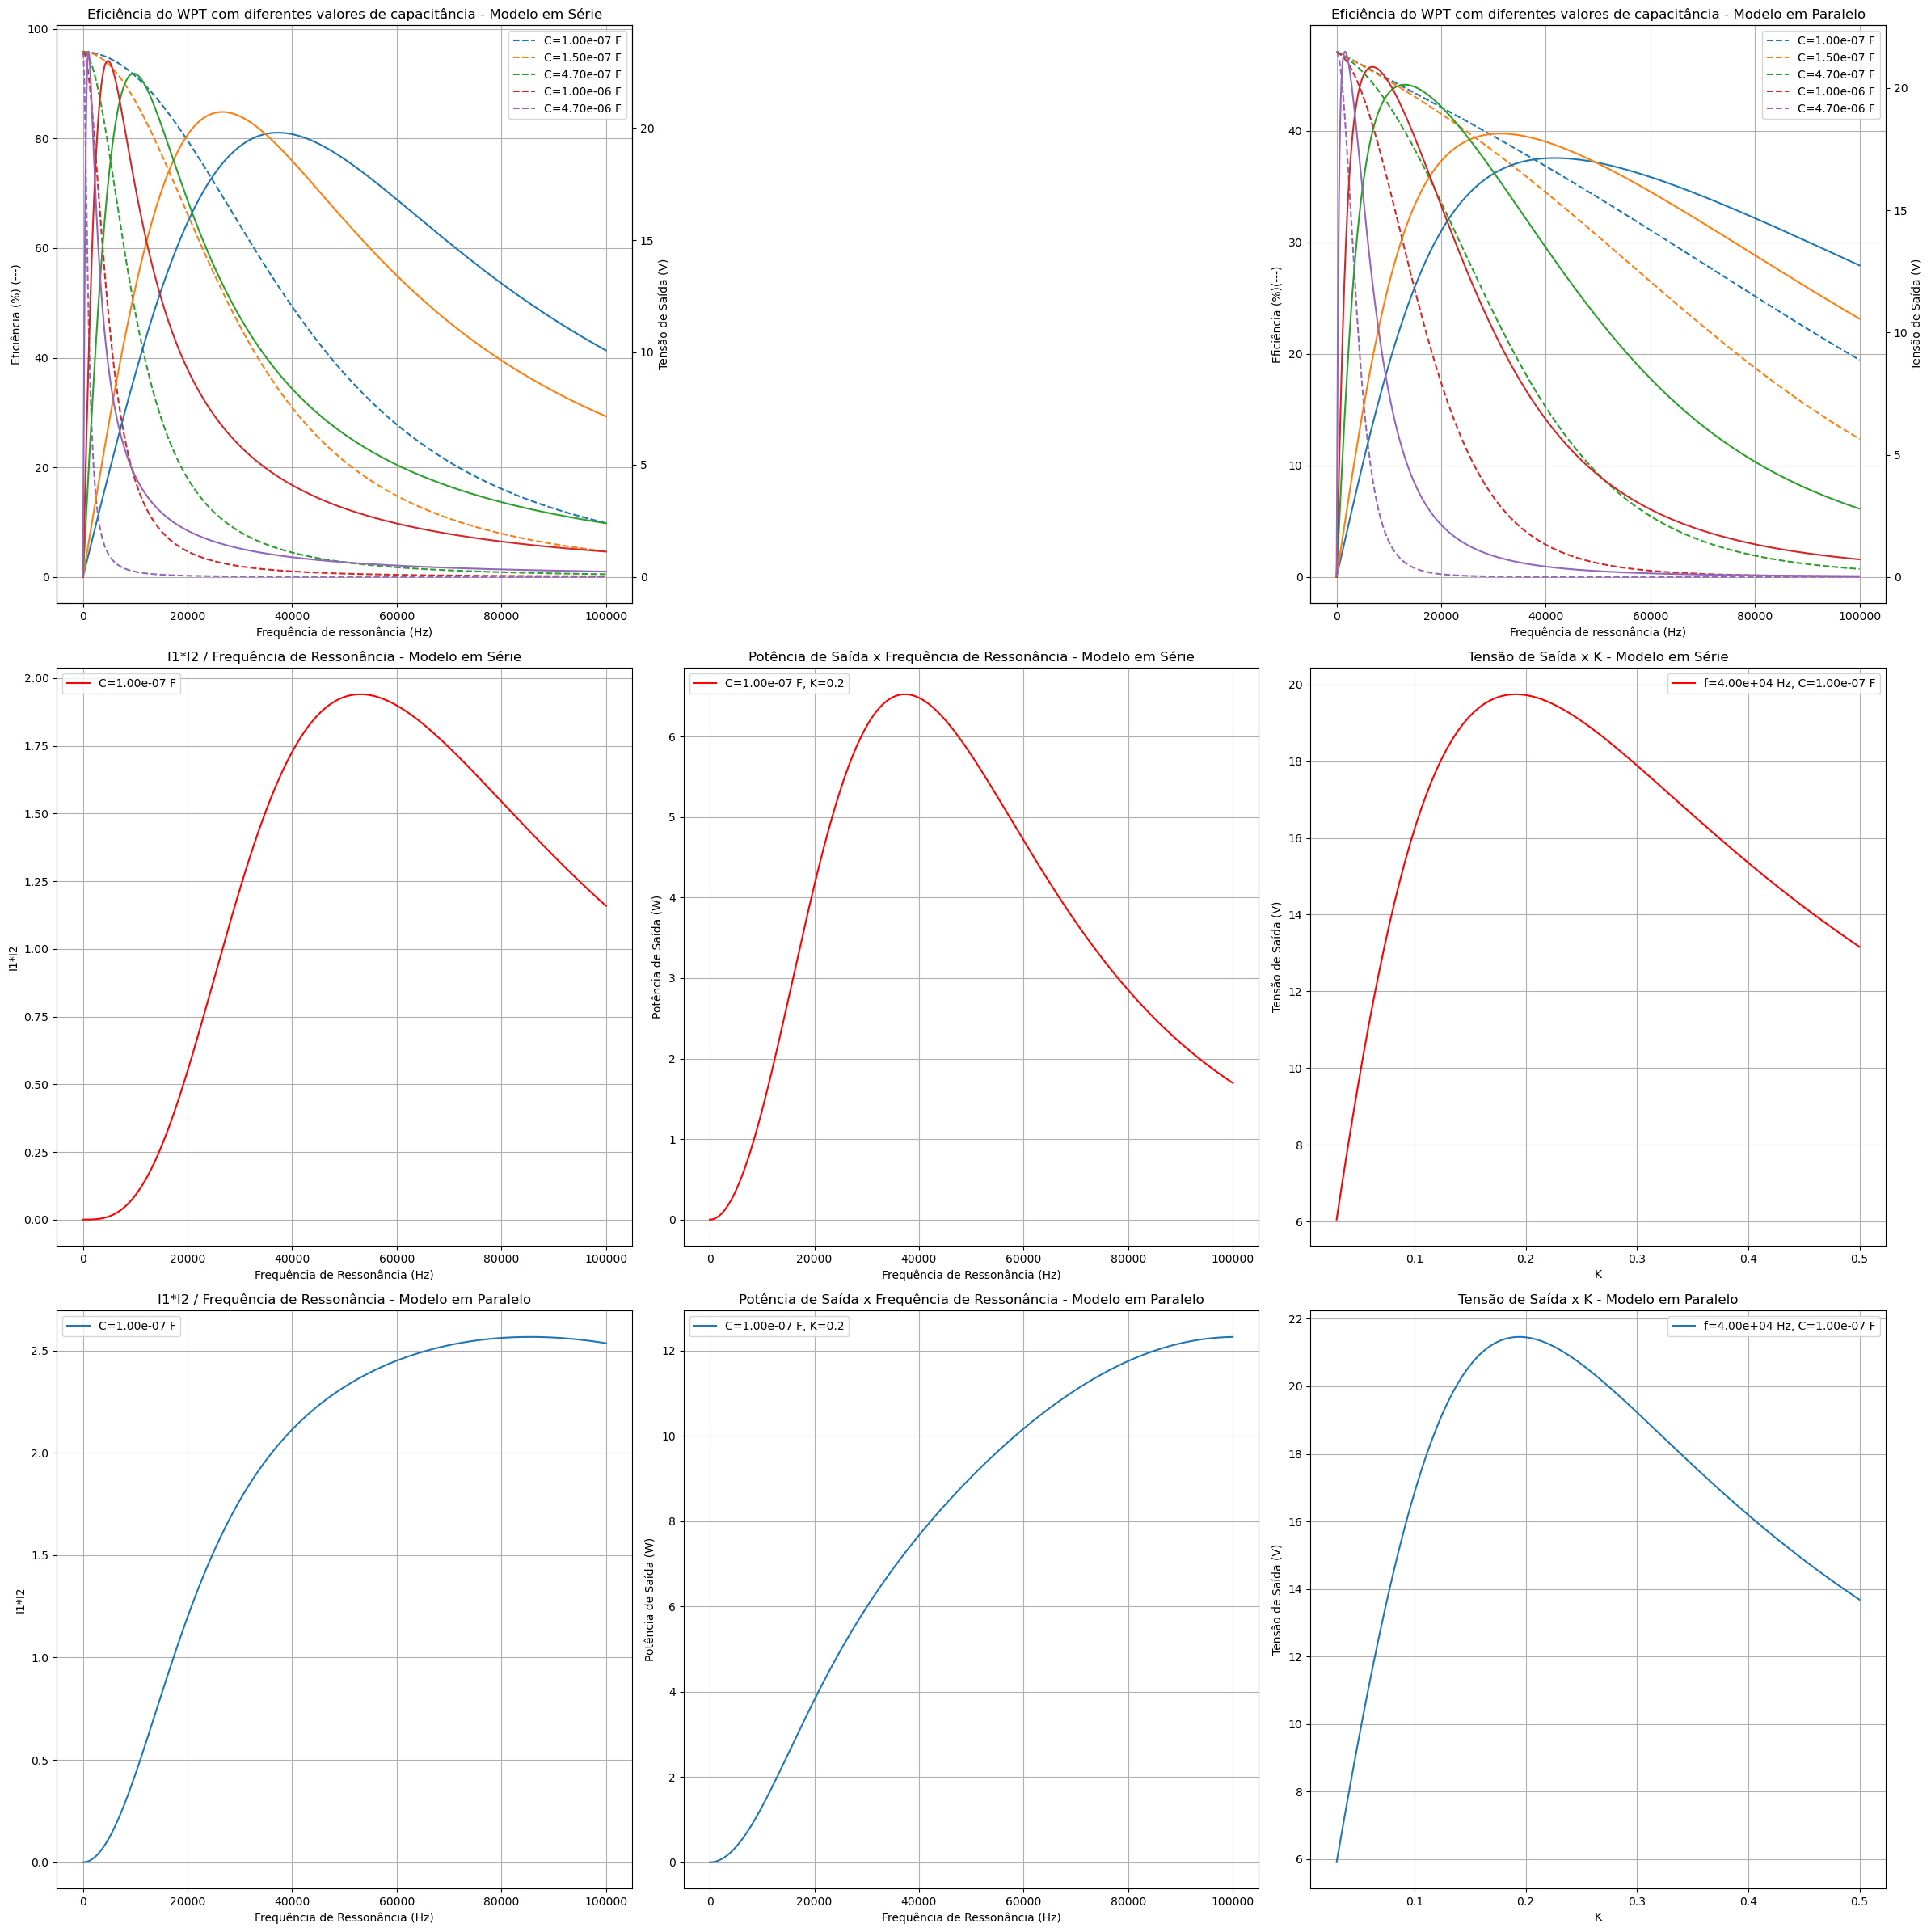

In [225]:
K = 0.2
f = 40e3 
Kmax = 0.5
C = 1e-7
R_DC = 1.296
Rcarga = 30
Ufonte = 10
freq_max = 100e3
C_values = [1e-7, 1.5e-7, 4.7e-7, 1e-6, 4.7e-6]

# Criando subplots de 3 linhas e 3 colunas
fig, axes = plt.subplots(3, 3, figsize=(24, 24))

# Plotando os gráficos
graficoeficiencia_serie(axes[0, 0], C_values, R_DC, Ufonte, Rcarga)
axes[0, 1].axis('off')
graficoeficiencia_paralelo(axes[0, 2], C_values, R_DC, Ufonte, Rcarga)

graficoI1I2f_serie(axes[1, 0], Ufonte, R_DC, K, C, Rcarga, freq_max)
graficoPsaidaf_serie(axes[1, 1], Ufonte, R_DC, K, C, Rcarga, freq_max)
graficoUsaidaK_serie(axes[1, 2], Ufonte, R_DC, C, Rcarga, Kmax, f)

graficoI1I2f_paralelo(axes[2, 0], Ufonte, R_DC, K, C, Rcarga, freq_max)
graficoPsaidaf_paralelo(axes[2, 1], Ufonte, R_DC, K, C, Rcarga, freq_max)
graficoUsaidaK_paralelo(axes[2, 2], Ufonte, R_DC, C, Rcarga, Kmax, f)

# Ajustando o layout
plt.tight_layout()
plt.show()

In [226]:
# Cálculo da Indutância

f = 40e3
C = 1e-7

L = (1/ ((2*pi*f)**2 * C))*10**3

print('L = %.8f mH' %L)

L = 0.15831435 mH


**Parte 6 - Atualização dos Parâmetros**

Primeiramente foi determinado que o sistema em paralelo é ideal para o projeto, por conta de conseguir fornecer correntes maiores na bobina secundária. Após isto foi montado as bobinas primárias e secondárias, então, determinou-se experimentalmente as suas respectivas resistências internas e indutâncias.

In [227]:
# Definindo as variáveis

Vp = 10
f = 40e3
W = 2*pi*f

R1 = 1.7
R2 = 1.7
L1 = 160e-6
L2 = 160e-6
C = 1e-7

XL1 = 1j * W * L1
XL2 = 1j * W * L2
XC1 = 1/(1j * W * C)
XC2 = XC1


In [228]:
K = 0.18 # A se determinar
Rcarga = 30
M = sqrt(L1*L2)*K
XM = 1j * W * M
Ufonte = (2/pi)*Vp*cos(W*1) 

Z = np.array([[R1 + XL1 + XC1, -XM], [-XM, XL2 + R2 + (Rcarga * XC2 / (Rcarga + XC2))]])
V = np.array([Ufonte, 0])
i = np.dot(linalg.inv(Z), V)

i1, i2 = i[0], i[1]
V2 = i2 * Rcarga

print(f'Para o modelo em paralelo, com a Constante de Acoplamento (K) = {K} e a frequência de {f*(10**-3)} kHz, temos:')
print('i1 (eficaz) = %.8f A' %np.abs(i1))
print('i2 (eficaz) = %.8f A' %np.abs(i2))
print('V1 (eficaz): %.2f V' %np.abs(Ufonte))
print('V2 (eficaz): %.2f V' %(np.abs(V2)))

print('Relação N1/N2: %.2f' %(np.abs(sqrt(L1/L2))))
print('Relação i2/i1: %.2f' %(np.abs(i2)/np.abs(i1)))
print('Relação V1/V2: %.2f' %(np.abs(Ufonte)/np.abs(V2)))

Para o modelo em paralelo, com a Constante de Acoplamento (K) = 0.18 e a frequência de 40.0 kHz, temos:
i1 (eficaz) = 2.26479884 A
i2 (eficaz) = 0.49451056 A
V1 (eficaz): 6.37 V
V2 (eficaz): 14.84 V
Relação N1/N2: 1.00
Relação i2/i1: 0.22
Relação V1/V2: 0.43


**Parte 7 - Gráfico Tensões de Pico X K**

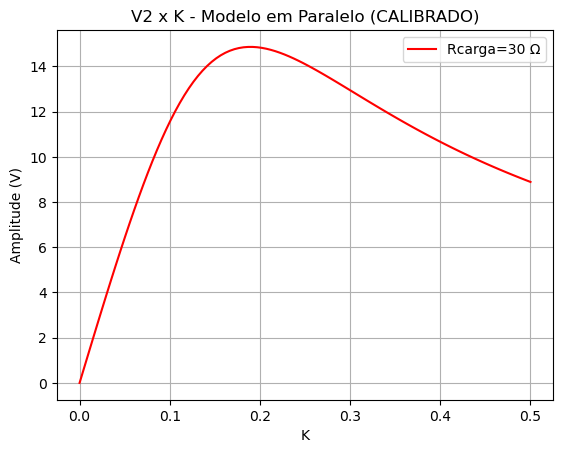

In [231]:
for Rcarga in [30]:
    
    Kmax = 0.5

    Ufonte = (2/pi) * Vp * cos(W*1) # Como a frequência é muito alta, Ufonte será constante para qualquer valor de t
    V2list = []

    for K in np.linspace(0, Kmax, 100):

        M = sqrt(L1*L2)*K
        XM = 1j * W * M

        Z=np.array([[R1+XL1+XC1, -XM],[-XM, XL2+R2+(Rcarga*XC2/(Rcarga+XC2))]])
        V=np.array([Ufonte,0])
        i=np.dot(linalg.inv(Z),V)

        I2 = i[1]
        V2 = I2*Rcarga
        V2list.append(np.abs(V2))

    # Plotando o gráfico V2 x K

    plt.plot(np.linspace(0, Kmax, 100), V2list, 'r-', label=f'Rcarga={Rcarga} Ω', )
    
plt.xlabel('K')
plt.ylabel('Amplitude (V)')
plt.title('V2 x K - Modelo em Paralelo (CALIBRADO)')
plt.legend()
plt.grid(True)
plt.show()
